<span style="font-family: Arial; font-weight:bold;font-size:2.3em;color:#fff;">------------------

<span style="font-family: Arial; font-weight:bold;font-size:2.3em;color:#fff;">------------------
<span style="font-family: Arial; font-weight:bold;font-size:2.3em;color:#fa9200;">FIFA World Cup
    
 
    

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#0ab6fa">Dataset Information:-

The FIFA World Cup is a global football competition contested by the various football-playing nations of the world. It is contested every four years and is the most prestigious and important trophy in the sport of football.

The FIFA World Cup, often simply called the World Cup, is an international association football competition contested by the senior men's national teams of the members of the Fédération Internationale de Football Association (FIFA), the sport's global governing body. The championship has been awarded every four years since the inaugural tournament in 1930, except in 1942 and 1946 when it was not held because of the Second World War.

The World Cups dataset shows all information about all the World Cups in history till 2014, while the World Cup Matches dataset shows all the results from the matches contested as part of the cups.

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#0ab6fa">Problem Statement:-
    
    

A new football club named ‘Brussels United FC’ has just been inaugurated. As a member of this club, you have been assigned a task to carry analysis on matches, players, and world cup data. Here we need to analyze the countries which have won the world cup the most with attendance, goal, and matches per cup based on cities. Also distribution of home and away goals. Whether playing in the home country is a factor for winning or not?

**Steps needs to be followed-**


* Total goals scored by year
* Total matches played and qualified teams by year
* Matches with the highest number of attendance
* Cities that hosted highest world cup matches
* Average attendance by city
* Teams with the most world cup final victories
* World cup final results by nation
* Match outcomes by home and away teams

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#0ab6fa">Data Definition:-

In [1]:
# Installing required libraries
!pip install expectexception

In [2]:
# Preparing the environment
import expectexception
# %%expect_exception TypeError

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Preparing the environment
%matplotlib inline

In [4]:
# Loading files
df_matches = pd.read_csv('data/WorldCupMatches.csv')
df_players = pd.read_csv('data/WorldCupPlayers.csv')
df_cups = pd.read_csv('data/WorldCups.csv')

In [5]:
# Setting config for pandas
pd.set_option('display.max_columns', None)

In [6]:
# Setting config for matplotlib
plot_param     = {'axes.labelsize': 10, 'xtick.labelsize': 10, 'ytick.labelsize': 10, 
                   'legend.fontsize': 10, 'font.size': 10}
plt.rcParams.update(**plot_param)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">1. World Cup Matches Dataset

- **Year**: The year in which the match was played
- **Datetime**: The Date on which the match was played along with a 24 hour format time
- **Stage**: The stage at which the match was played
- **Stadium**: Stadium name where the match was held
- **City**: The city name, where the match was played
- **Home Team Name**: Home team country name
- **Home Team Goals**: Total goals scored by the home team by the end of the match
- **Away Team Goals**: Total goals scored by the away team by the end of the match
- **Away Team Name**: Away team country name
- **Win conditions**: Special win condition (if any)
- **Attendance**: Total crowd present at the stadium
- **Half-time Home Goals**: Goals scored by the home team until half time
- **Half-time Away Goals**: Goals scored by the away team until half time
- **Referee**: Name of the first referee
- **Assistant 1**: Name of the first assistant referee (linesman)
- **Assistant 2**: Name of the second assistant referee (linesman)
- **RoundID**: Unique ID of the Round
- **MatchID**: Unique ID of the Match
- **Home Team Initials**: Home team country's three letter initials
- **Away Team Initials**: Away team country's three left

### * * * WorldCupMatches.csv * * *

In [7]:
# Exploring WorldCupMatches
df_matches.head(3)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA


In [8]:
# Table info
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

In [9]:
# Table shape
df_matches.shape

(4572, 20)

### Reviewing Null values

In [10]:
# Counting nulls
df_matches.isna().sum()

Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

In [11]:
# Reviewing null values
df_matches[df_matches.isna()]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Counting nulls in each row
df_matches.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
4567    20
4568    20
4569    20
4570    20
4571    20
Length: 4572, dtype: int64

In [13]:
# displaying rows with null values
# df_matches[df_matches.isnull().sum(axis=1)>0]
df_matches[df_matches.isna().any(axis=1)]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
823,2014.0,30 Jun 2014 - 17:00,Round of 16,Estadio Beira-Rio,Porto Alegre,Germany,2.0,1.0,Algeria,Germany win after extra time,NaN,0.0,0.0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),255951.0,300186460.0,GER,ALG
841,2014.0,30 Jun 2014 - 17:00,Round of 16,Estadio Beira-Rio,Porto Alegre,Germany,2.0,1.0,Algeria,Germany win after extra time,NaN,0.0,0.0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),255951.0,300186460.0,GER,ALG
852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# displaying rows with null values
df_matches[df_matches.isnull().sum(axis=1)>2]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Dropping null values
df_matches.drop(index=df_matches[df_matches.isnull().sum(axis=1)>2].index, inplace=True)
df_matches.isna().sum()

Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              2
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64

In [16]:
# Filling the remaining null values
df_matches.fillna(0, inplace=True)
df_matches.isna().sum()

Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              0
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64

In [17]:
# Casting to int the year column
# df_matches.Year = df_matches.Year.astype(int)
df_matches = df_matches.convert_dtypes(convert_string=False)
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  852 non-null    Int64 
 1   Datetime              852 non-null    object
 2   Stage                 852 non-null    object
 3   Stadium               852 non-null    object
 4   City                  852 non-null    object
 5   Home Team Name        852 non-null    object
 6   Home Team Goals       852 non-null    Int64 
 7   Away Team Goals       852 non-null    Int64 
 8   Away Team Name        852 non-null    object
 9   Win conditions        852 non-null    object
 10  Attendance            852 non-null    Int64 
 11  Half-time Home Goals  852 non-null    Int64 
 12  Half-time Away Goals  852 non-null    Int64 
 13  Referee               852 non-null    object
 14  Assistant 1           852 non-null    object
 15  Assistant 2           852 non-null    ob

### Reviewing Duplicated rows

In [18]:
print(df_matches[df_matches.duplicated()].shape)
df_matches[df_matches.duplicated()].sort_values(['Year', 'MatchID'])

(16, 20)


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
839,2014,29 Jun 2014 - 17:00,Round of 16,Arena Pernambuco,Recife,Costa Rica,1,1,Greece,Costa Rica win on penalties (5 - 3),41242,0,0,Ben WILLIAMS (AUS),CREAM Matthew (AUS),ANAZ Hakan (AUS),255951,300186459,CRC,GRE
841,2014,30 Jun 2014 - 17:00,Round of 16,Estadio Beira-Rio,Porto Alegre,Germany,2,1,Algeria,Germany win after extra time,0,0,0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),255951,300186460,GER,ALG
845,2014,04 Jul 2014 - 17:00,Quarter-finals,Estadio Castelao,Fortaleza,Brazil,2,1,Colombia,,60342,1,0,Carlos VELASCO CARBALLO (ESP),ALONSO FERNANDEZ Roberto (ESP),YUSTE Juan (ESP),255953,300186461,BRA,COL
840,2014,30 Jun 2014 - 13:00,Round of 16,Estadio Nacional,Brasilia,France,2,0,Nigeria,,67882,0,0,GEIGER Mark (USA),HURD Sean (USA),FLETCHER Joe (CAN),255951,300186462,FRA,NGA
848,2014,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1,7,Germany,,58141,0,5,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955,300186474,BRA,GER
844,2014,04 Jul 2014 - 13:00,Quarter-finals,Estadio do Maracana,Rio De Janeiro,France,0,1,Germany,,74240,0,1,PITANA Nestor (ARG),MAIDANA Hernan (ARG),BELATTI Juan Pablo (ARG),255953,300186485,FRA,GER
836,2014,28 Jun 2014 - 13:00,Round of 16,Estadio Mineirao,Belo Horizonte,Brazil,1,1,Chile,Brazil win on penalties (3 - 2),57714,0,0,WEBB Howard (ENG),MULLARKEY Michael (ENG),Darren CANN (ENG),255951,300186487,BRA,CHI
847,2014,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0,0,Costa Rica,Netherlands win on penalties (4 - 3),51179,0,0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953,300186488,NED,CRC
849,2014,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0,0,Argentina,Argentina win on penalties (2 - 4),63267,0,0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955,300186490,NED,ARG
837,2014,28 Jun 2014 - 17:00,Round of 16,Estadio do Maracana,Rio De Janeiro,Colombia,2,0,Uruguay,,73804,1,0,Bj�rn KUIPERS (NED),Sander VAN ROEKEL (NED),Erwin ZEINSTRA (NED),255951,300186491,COL,URU


In [19]:
df_matches[df_matches.MatchID==300186459]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
833,2014,29 Jun 2014 - 17:00,Round of 16,Arena Pernambuco,Recife,Costa Rica,1,1,Greece,Costa Rica win on penalties (5 - 3),41242,0,0,Ben WILLIAMS (AUS),CREAM Matthew (AUS),ANAZ Hakan (AUS),255951,300186459,CRC,GRE
839,2014,29 Jun 2014 - 17:00,Round of 16,Arena Pernambuco,Recife,Costa Rica,1,1,Greece,Costa Rica win on penalties (5 - 3),41242,0,0,Ben WILLIAMS (AUS),CREAM Matthew (AUS),ANAZ Hakan (AUS),255951,300186459,CRC,GRE


In [20]:
df_matches.drop_duplicates(inplace=True)
print('Duplicated: ', df_matches[df_matches.duplicated()].shape)
df_matches.info()

Duplicated:  (0, 20)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 836 entries, 0 to 835
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  836 non-null    Int64 
 1   Datetime              836 non-null    object
 2   Stage                 836 non-null    object
 3   Stadium               836 non-null    object
 4   City                  836 non-null    object
 5   Home Team Name        836 non-null    object
 6   Home Team Goals       836 non-null    Int64 
 7   Away Team Goals       836 non-null    Int64 
 8   Away Team Name        836 non-null    object
 9   Win conditions        836 non-null    object
 10  Attendance            836 non-null    Int64 
 11  Half-time Home Goals  836 non-null    Int64 
 12  Half-time Away Goals  836 non-null    Int64 
 13  Referee               836 non-null    object
 14  Assistant 1           836 non-null    object
 15  Assistant 2        

### Getting into table stats

In [21]:
df_matches.describe(include='all')

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
count,836.0,836,836,836,836,836,836.0,836.0,836,836,836.0,836.0,836.0,836,836,836,836.0,836.0,836,836
unique,<NA>,602,23,181,151,78,<NA>,<NA>,83,43,<NA>,<NA>,<NA>,366,387,408,<NA>,<NA>,77,82
top,<NA>,27 May 1934 - 16:30,Round of 16,Estadio Azteca,Mexico City,Brazil,<NA>,<NA>,Mexico,,<NA>,<NA>,<NA>,Ravshan IRMATOV (UZB),GONZALEZ ARCHUNDIA Alfonso (MEX),KOCHKAROV Bakhadyr (KGZ),<NA>,<NA>,BRA,MEX
freq,<NA>,8,64,19,23,78,<NA>,<NA>,37,779,<NA>,<NA>,<NA>,9,7,9,<NA>,<NA>,78,37
mean,1984.535885,NaN,NaN,NaN,NaN,NaN,1.824163,1.021531,NaN,NaN,44805.797847,0.7189,0.427033,NaN,NaN,NaN,10860927.035885,56775774.381579,NaN,NaN
std,22.29986,NaN,NaN,NaN,NaN,NaN,1.619178,1.072024,NaN,NaN,23588.081061,0.941995,0.675091,NaN,NaN,NaN,27518016.061945,107032911.309264,NaN,NaN
min,1930.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,201.0,25.0,NaN,NaN
25%,1970.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,29800.0,0.0,0.0,NaN,NaN,NaN,262.0,1183.5,NaN,NaN
50%,1990.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,41000.0,0.0,0.0,NaN,NaN,NaN,337.0,2113.5,NaN,NaN
75%,2002.0,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,NaN,60984.5,1.0,1.0,NaN,NaN,NaN,249722.0,43950047.25,NaN,NaN


In [22]:
# Reviewing unique values in Win conditions
df_matches['Win conditions'].unique()

array([' ', 'Austria win after extra time ',
       'Italy win after extra time ', 'Brazil win after extra time ',
       'Czechoslovakia win after extra time ',
       'Hungary win after extra time ',
       'Northern Ireland win after extra time ',
       'England win after extra time ',
       'Germany FR win after extra time ',
       'Uruguay win after extra time ', 'Argentina win after extra time ',
       ' win on penalties (5 - 4) ', 'Belgium win after extra time ',
       'France win on penalties (3 - 4) ',
       'Germany FR win on penalties (4 - 1) ',
       'Belgium win on penalties (4 - 5) ',
       'France win after extra time ', 'Cameroon win after extra time ',
       'Republic of Ireland win on penalties (5 - 4) ',
       'Yugoslavia win after extra time ', ' win on penalties (2 - 3) ',
       ' win on penalties (3 - 4) ', ' win on penalties (4 - 3) ',
       'Bulgaria win on penalties (1 - 3) ',
       'Sweden win on penalties (4 - 5) ',
       'Brazil win on penaltie

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">2. World Cup Players Dataset
    
- **RoundID**: Unique ID of the Round
- **MatchID**: Unique ID of the Match
- **Team Initials**: Player's team country's three letter initials
- **Coach Name**: Player's coach name
- **Line-up**: Indicates whether the player was in the starting line-up or not
- **Shirt Number**: Player's shirt number
- **Player Name**: Player's name
- **Position**: Position that the player played in
- **Event**: Important event involving the player (if any)

### * * * WorldCupPlayers.csv * * *

In [23]:
# Exploring the table
df_players.head(3)

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'


In [24]:
# Reviewing its shape
df_players.shape

(37784, 9)

In [25]:
# Checking the table info
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37784 non-null  int64 
 1   MatchID        37784 non-null  int64 
 2   Team Initials  37784 non-null  object
 3   Coach Name     37784 non-null  object
 4   Line-up        37784 non-null  object
 5   Shirt Number   37784 non-null  int64 
 6   Player Name    37784 non-null  object
 7   Position       4143 non-null   object
 8   Event          9069 non-null   object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


### Reviewing Null values

In [26]:
# Counting null values
df_players.isna().sum()

RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event            28715
dtype: int64

### Reviewing Duplicated rows

In [27]:
df_players[df_players.duplicated()]

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
37048,255951,300186487,BRA,SCOLARI Luiz Felipe (BRA),S,12,JULIO CESAR,GK,NaN
37049,255951,300186487,CHI,SAMPAOLI Jorge (ARG),S,1,C. BRAVO,GKC,NaN
37050,255951,300186487,BRA,SCOLARI Luiz Felipe (BRA),S,2,DANI ALVES,NaN,Y105'
37051,255951,300186487,CHI,SAMPAOLI Jorge (ARG),S,2,MENA,NaN,Y17'
37052,255951,300186487,BRA,SCOLARI Luiz Felipe (BRA),S,3,T SILVA,C,NaN
...,...,...,...,...,...,...,...,...,...
37779,255959,300186501,ARG,SABELLA Alejandro (ARG),N,19,ALVAREZ,NaN,NaN
37780,255959,300186501,GER,LOEW Joachim (GER),N,6,KHEDIRA,NaN,NaN
37781,255959,300186501,ARG,SABELLA Alejandro (ARG),N,20,AGUERO,NaN,IH46' Y65'
37782,255959,300186501,GER,LOEW Joachim (GER),N,21,MUSTAFI,NaN,NaN


In [28]:
df_players[(df_players['Player Name']=='JULIO CESAR') & (df_players.MatchID==300186487)]

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
36312,255951,300186487,BRA,SCOLARI Luiz Felipe (BRA),S,12,JULIO CESAR,GK,NaN
37048,255951,300186487,BRA,SCOLARI Luiz Felipe (BRA),S,12,JULIO CESAR,GK,NaN


In [29]:
df_players.drop_duplicates(inplace=True)
df_players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37048 entries, 0 to 37047
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37048 non-null  int64 
 1   MatchID        37048 non-null  int64 
 2   Team Initials  37048 non-null  object
 3   Coach Name     37048 non-null  object
 4   Line-up        37048 non-null  object
 5   Shirt Number   37048 non-null  int64 
 6   Player Name    37048 non-null  object
 7   Position       4018 non-null   object
 8   Event          8823 non-null   object
dtypes: int64(3), object(6)
memory usage: 2.8+ MB


### Getting into table stats

In [30]:
df_players.describe(include='all')

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
count,3.704800e+04,3.704800e+04,37048,37048,37048,37048.000000,37048,4018,8823
unique,NaN,NaN,82,335,2,NaN,7663,3,1893
top,NaN,NaN,BRA,SCHOEN Helmut (FRG),N,NaN,RONALDO,GK,OH46'
freq,NaN,NaN,2311,550,18656,NaN,33,2348,239
mean,1.127104e+07,5.892272e+07,NaN,NaN,NaN,10.700713,NaN,NaN,NaN
std,2.793298e+07,1.083925e+08,NaN,NaN,NaN,6.964117,NaN,NaN,NaN
min,2.010000e+02,2.500000e+01,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
25%,2.620000e+02,1.190000e+03,NaN,NaN,NaN,5.000000,NaN,NaN,NaN
50%,3.370000e+02,2.196000e+03,NaN,NaN,NaN,11.000000,NaN,NaN,NaN
75%,2.497220e+05,4.395006e+07,NaN,NaN,NaN,17.000000,NaN,NaN,NaN


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">3. World Cup Dataset
  
- **Year**: Year in which the world cup was held
- **Country**: Country where the world cup was held
- **Winner**: Team that won the world cup
- **Runners-Up**: Team that came second
- **Third**: Team that came third
- **Fourth**: Team that came fourth
- **GoalsScored**: Total goals scored in the world cup
- **QualifiedTeams**: Number of teams that qualified for the world cup
- **MatchesPlayed**: Total matches played in the world cup
- **Attendance**: Total attendance in the world cup

### * * * WorldCups.csv * * *

In [31]:
# Exploring the table
df_cups.head(3)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700


In [32]:
# Checking its size
df_cups.shape

(20, 10)

In [33]:
# Reviewing the table info
df_cups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


In [34]:
df_cups.Attendance

0       590.549
1       363.000
2       375.700
3     1.045.246
4       768.607
5       819.810
6       893.172
7     1.563.135
8     1.603.975
9     1.865.753
10    1.545.791
11    2.109.723
12    2.394.031
13    2.516.215
14    3.587.538
15    2.785.100
16    2.705.197
17    3.359.439
18    3.178.856
19    3.386.810
Name: Attendance, dtype: object

In [35]:
df_cups.Attendance = df_cups.Attendance.map(lambda x: x.replace('.',''))
df_cups.Attendance

0      590549
1      363000
2      375700
3     1045246
4      768607
5      819810
6      893172
7     1563135
8     1603975
9     1865753
10    1545791
11    2109723
12    2394031
13    2516215
14    3587538
15    2785100
16    2705197
17    3359439
18    3178856
19    3386810
Name: Attendance, dtype: object

In [36]:
df_cups.Attendance = df_cups.Attendance.astype(int)
# df_cups = df_cups.convert_dtypes(convert_integer=True)
df_cups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     int32 
dtypes: int32(1), int64(4), object(5)
memory usage: 1.6+ KB


### Reviewing Null values

In [37]:
# Reviewing the table info
df_cups.isna().sum()

Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attendance        0
dtype: int64

### Reviewing Duplicated rows

In [38]:
df_cups[df_cups.duplicated()]

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance


### Getting into table stats

In [39]:
df_cups.describe(include='all')

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
count,20.000000,20,20,20,20,20,20.000000,20.000000,20.000000,2.000000e+01
unique,NaN,15,9,10,14,16,NaN,NaN,NaN,NaN
top,NaN,Italy,Brazil,Argentina,Germany,Uruguay,NaN,NaN,NaN,NaN
freq,NaN,2,5,3,3,3,NaN,NaN,NaN,NaN
mean,1974.800000,NaN,NaN,NaN,NaN,NaN,118.950000,21.250000,41.800000,1.872882e+06
std,25.582889,NaN,NaN,NaN,NaN,NaN,32.972836,7.268352,17.218717,1.071842e+06
min,1930.000000,NaN,NaN,NaN,NaN,NaN,70.000000,13.000000,17.000000,3.630000e+05
25%,1957.000000,NaN,NaN,NaN,NaN,NaN,89.000000,16.000000,30.500000,8.748315e+05
50%,1976.000000,NaN,NaN,NaN,NaN,NaN,120.500000,16.000000,38.000000,1.734864e+06
75%,1995.000000,NaN,NaN,NaN,NaN,NaN,145.250000,26.000000,55.000000,2.725173e+06


In [40]:
#Your Code here

# Steps needs to be followed

## (1) Total goals scored by year

In [41]:
df_matches['Total Goals'] = df_matches['Home Team Goals'] + df_matches['Away Team Goals']
# df_matches.groupby('Year')[['Home Team Goals', 'Away Team Goals', 'Total Goals']].sum().reset_index()
df_matches.groupby('Year').agg(
    {'MatchID': 'count', 'Home Team Goals': sum, 'Away Team Goals': sum, 'Total Goals': sum}).reset_index()

,Year,MatchID,Home Team Goals,Away Team Goals,Total Goals
0,1930,18,59,11,70
1,1934,17,48,22,70
2,1938,18,61,23,84
3,1950,22,69,19,88
4,1954,26,109,31,140
5,1958,35,88,38,126
6,1962,32,69,20,89
7,1966,32,69,20,89
8,1970,32,72,23,95
9,1974,38,51,46,97


## (2) Total matches played and qualified teams by year

In [42]:
df_cups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607


In [43]:
df_cups[['Year', 'Winner', 'MatchesPlayed', 'QualifiedTeams']]

,Year,Winner,MatchesPlayed,QualifiedTeams
0,1930,Uruguay,18,13
1,1934,Italy,17,16
2,1938,Italy,18,15
3,1950,Uruguay,22,13
4,1954,Germany FR,26,16
5,1958,Brazil,35,16
6,1962,Brazil,32,16
7,1966,England,32,16
8,1970,Brazil,32,16
9,1974,Germany FR,38,16


In [44]:
df_matches.groupby('Year')[['RoundID', 'MatchID']].nunique()

,RoundID,MatchID
Year,,
1930,3,18
1934,5,17
1938,5,18
1950,2,22
1954,5,26
1958,5,35
1962,5,32
1966,5,32
1970,5,32


## (3) Matches with the highest number of attendance

In [45]:
df_matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Total Goals
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX,5
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL,3
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA,3
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER,4
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA,1


In [46]:
# monkey-patch: 
# https://stackoverflow.com/questions/29663252/can-you-format-pandas-integers-for-display-like-pd-options-display-float-forma
# https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html#Finer-Control:-Display-Values
df_matches.groupby(['Year']).Attendance.sum().reset_index().style.format('{:,}')

,Year,Attendance
0,"1,930","590,549"
1,"1,934","363,000"
2,"1,938","375,700"
3,"1,950","1,045,246"
4,"1,954","768,607"
5,"1,958","819,810"
6,"1,962","893,172"
7,"1,966","1,563,135"
8,"1,970","1,603,975"
9,"1,974","1,865,753"


In [47]:
df_cups[['Year', 'Attendance']].style.format('{:,}')

,Year,Attendance
0,"1,930","590,549"
1,"1,934","363,000"
2,"1,938","375,700"
3,"1,950","1,045,246"
4,"1,954","768,607"
5,"1,958","819,810"
6,"1,962","893,172"
7,"1,966","1,563,135"
8,"1,970","1,603,975"
9,"1,974","1,865,753"


In [48]:
df_matches.groupby(['Year','MatchID']).Attendance.sum().sort_values(ascending=False).reset_index()

,Year,MatchID,Attendance
0,1950,1190,173850
1,1950,1186,152772
2,1950,1191,142429
3,1950,1189,138886
4,1986,393,114600
...,...,...,...
831,1934,1129,3000
832,1958,1408,2823
833,1930,1098,2549
834,1930,1094,2000


In [49]:
df_matches[df_matches.MatchID==300186460]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Total Goals
823,2014,30 Jun 2014 - 17:00,Round of 16,Estadio Beira-Rio,Porto Alegre,Germany,2,1,Algeria,Germany win after extra time,0,0,0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),255951,300186460,GER,ALG,3


<Axes: >

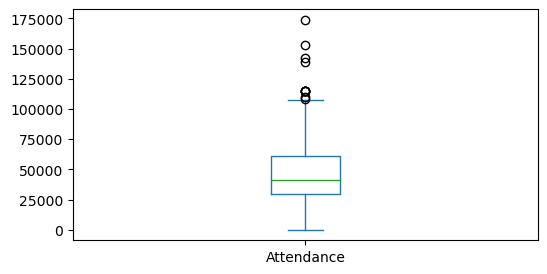

In [50]:
df_matches.Attendance.plot(kind='box', figsize=(6,3))

In [51]:
df_matches['Home Winner'] = df_matches['Home Team Goals'] > df_matches['Away Team Goals'] 
df_matches['Winner'] = df_matches.apply(lambda x: x['Home Team Initials'] if x['Home Winner'] else x['Away Team Initials'], 
                                        axis=1)
df_matches['Looser'] = df_matches.apply(lambda x: x['Away Team Initials'] if x['Home Winner'] else x['Home Team Initials'], 
                                        axis=1)
df_matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Total Goals,Home Winner,Winner,Looser
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX,5,True,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL,3,True,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA,3,True,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER,4,True,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA,1,True,ARG,FRA


In [52]:
df_matches[['Year', 'MatchID', 'Home Winner', 'Winner', 'Looser', 
            'Home Team Goals', 'Away Team Goals', 'Attendance']].sort_values(
    by=['Year', 'Attendance'], ascending=(True, False)).head()

,Year,MatchID,Home Winner,Winner,Looser,Home Team Goals,Away Team Goals,Attendance
16,1930,1101,True,URU,YUG,6,1,79867
15,1930,1088,True,ARG,USA,6,1,72886
13,1930,1100,True,URU,ROU,4,0,70022
17,1930,1087,True,URU,ARG,4,2,68346
8,1930,1099,True,URU,PER,1,0,57735


In [53]:
winner_by_year = df_matches.iloc[df_matches.groupby(['Year'])['Attendance'].idxmax()][
           ['Year', 'MatchID', 'Home Winner', 'Winner', 'Looser', 
            'Home Team Goals', 'Away Team Goals', 'Attendance']]
winner_by_year

,Year,MatchID,Home Winner,Winner,Looser,Home Team Goals,Away Team Goals,Attendance
16,1930,1101,True,URU,YUG,6,1,79867
34,1934,1134,True,ITA,TCH,2,1,55000
47,1938,1164,True,ITA,FRA,3,1,58455
74,1950,1190,True,URU,BRA,2,1,173850
100,1954,1278,True,FRG,HUN,3,2,62500
118,1958,1344,True,BRA,URS,2,0,50928
165,1962,1458,True,BRA,CHI,4,2,76594
188,1966,1632,True,ENG,FRA,2,0,98270
223,1970,1752,True,MEX,BEL,1,0,108192
233,1974,2003,True,FRG,CHI,1,0,81100


In [54]:
df_matches[['Home Winner']].value_counts(normalize=True)
df_matches['Home Loose'] = (~df_matches['Home Winner']) 

pd.concat([df_matches[['Home Winner']].value_counts(), 
           df_matches[['Home Winner']].value_counts(normalize=True)], axis=1, keys=('Counts', 'Percent'))

,Counts,Percent
Home Winner,,
True,479,0.572967
False,357,0.427033


## (4) Cities that hosted highest world cup matches

In [55]:
cities_host = df_matches.groupby(['Year','City']).agg(
    {'MatchID': 'count', 'Home Winner': 'sum', 'Home Loose': 'sum', 'Attendance': 'sum'}).sort_values(
    ['Year', 'MatchID', 'Attendance'], ascending=(True, False, False)).reset_index()
cities_host

,Year,City,MatchID,Home Winner,Home Loose,Attendance
0,1930,Montevideo,18,18,0,590549
1,1934,Rome,3,3,0,95000
2,1934,Florence,3,2,1,86000
3,1934,Milan,3,3,0,71000
4,1934,Bologna,2,2,0,37000
...,...,...,...,...,...,...
175,2014,Porto Alegre,5,2,3,171906
176,2014,Manaus,4,0,4,160227
177,2014,Cuiaba,4,2,2,158717
178,2014,Natal,4,1,3,158167


In [56]:
cities_host[cities_host.Year==1934]

,Year,City,MatchID,Home Winner,Home Loose,Attendance
1,1934,Rome,3,3,0,95000
2,1934,Florence,3,2,1,86000
3,1934,Milan,3,3,0,71000
4,1934,Bologna,2,2,0,37000
5,1934,Turin,2,2,0,28000
6,1934,Naples,2,2,0,16000
7,1934,Genoa,1,1,0,21000
8,1934,Trieste,1,1,0,9000


In [57]:
cities_host.iloc[cities_host.groupby(['Year'])['MatchID'].idxmax()]

,Year,City,MatchID,Home Winner,Home Loose,Attendance
0,1930,Montevideo,18,18,0,590549
1,1934,Rome,3,3,0,95000
9,1938,Colombes,3,3,0,133909
19,1950,Rio De Janeiro,8,8,0,813541
25,1954,Basel,6,5,1,220000
31,1958,Solna,8,6,2,229954
43,1962,Santiago De Chile,10,9,1,663771
47,1966,London,10,7,3,823696
54,1970,Mexico City,10,9,1,936199
59,1974,Frankfurt/Main,5,1,4,300000


In [58]:
# df_matches.groupby('City')['MatchID'].count().sort_values(ascending=False).reset_index()
df_matches.groupby(['City']).agg(
    {'MatchID': 'count', 'Home Winner': 'sum', 'Home Loose': 'sum', 'Attendance': 'sum'}).sort_values(
    'MatchID', ascending=False).head(10)

,MatchID,Home Winner,Home Loose,Attendance
City,,,,
Mexico City,23,16,7,2157550
Montevideo,18,18,0,590549
Guadalajara,17,10,7,800456
Rio De Janeiro,15,12,3,1332730
Johannesburg,15,9,6,1043702
Buenos Aires,12,10,2,749786
Sao Paulo,12,8,4,543954
Leon,11,6,5,272222
Munich,11,6,5,655500


## (5) Average attendance by city

In [59]:
cities_host = df_matches.groupby(['Year','City']).agg(
    {'MatchID': 'count', 'Home Winner': 'sum', 'Home Loose': 'sum', 'Attendance': 'mean'}).sort_values(
    ['Year', 'MatchID', 'Attendance'], ascending=(True, False, False)).reset_index()
cities_host

,Year,City,MatchID,Home Winner,Home Loose,Attendance
0,1930,Montevideo,18,18,0,32808.277778
1,1934,Rome,3,3,0,31666.666667
2,1934,Florence,3,2,1,28666.666667
3,1934,Milan,3,3,0,23666.666667
4,1934,Bologna,2,2,0,18500.0
...,...,...,...,...,...,...
175,2014,Porto Alegre,5,2,3,34381.2
176,2014,Manaus,4,0,4,40056.75
177,2014,Cuiaba,4,2,2,39679.25
178,2014,Natal,4,1,3,39541.75


## (6) Teams with the most world cup final victories

In [60]:
df_cups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607


In [61]:
cup_summary = pd.melt(df_cups, id_vars=['Year'], value_vars=['Winner', 'Runners-Up', 'Third', 'Fourth'],
                      var_name='Classification', value_name='Team')
cup_summary.head()

,Year,Classification,Team
0,1930,Winner,Uruguay
1,1934,Winner,Italy
2,1938,Winner,Italy
3,1950,Winner,Uruguay
4,1954,Winner,Germany FR


In [62]:
team_summary = pd.crosstab(cup_summary.Team, cup_summary.Classification)
team_summary['Total'] = team_summary.Fourth + team_summary['Runners-Up'] + team_summary.Third + team_summary.Winner
team_summary = team_summary[['Winner', 'Runners-Up', 'Third', 'Fourth', 'Total']]
team_summary.sort_values('Total', ascending=False)

Classification,Winner,Runners-Up,Third,Fourth,Total
Team,,,,,
Brazil,5,2,2,2,11
Italy,4,2,1,1,8
Germany FR,3,3,1,1,8
Argentina,2,3,0,0,5
Uruguay,2,0,0,3,5
Netherlands,0,3,1,1,5
France,1,1,2,1,5
Germany,1,1,3,0,5
Sweden,0,1,2,1,4


In [63]:
df_cups.groupby('Winner')['Year'].count().sort_values(ascending=False).reset_index()

,Winner,Year
0,Brazil,5
1,Italy,4
2,Germany FR,3
3,Argentina,2
4,Uruguay,2
5,England,1
6,France,1
7,Germany,1
8,Spain,1


## (7) World cup final results by nation

In [64]:
df_cups['Count'] = 1
df_cups.groupby('Country')[['Count', 'GoalsScored', 'QualifiedTeams', 'MatchesPlayed', 'Attendance']].sum().sort_values(
    by=['Count', 'GoalsScored'], ascending=(False, False))

,Count,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
Country,,,,,
Brazil,2,259,45,86,4432056
France,2,255,47,82,3160800
Germany,2,244,48,102,5225192
Mexico,2,227,40,84,3998006
Italy,2,185,40,69,2879215
Korea/Japan,1,161,32,64,2705197
Spain,1,146,24,52,2109723
South Africa,1,145,32,64,3178856
USA,1,141,24,52,3587538


## (8) Match outcomes by home and away teams

In [65]:
df_matches['Winner As'] = df_matches.apply(lambda x: 'Winner as Home' if x['Home Winner'] else 'Winner as Away', axis=1)

In [66]:
df_result = df_matches[['Year', 'Winner As']].value_counts().to_frame('Count').sort_index(level=[0, 1], ascending=(True, False))
df_result['Percent'] = df_result / df_result.groupby(level=0).sum()
df_result

Count   Percent
Year Winner As                      
1930 Winner as Home     18  1.000000
1934 Winner as Home     16  0.941176
     Winner as Away      1  0.058824
1938 Winner as Home     15  0.833333
     Winner as Away      3  0.166667
1950 Winner as Home     19  0.863636
     Winner as Away      3  0.136364
1954 Winner as Home     24  0.923077
     Winner as Away      2  0.076923
1958 Winner as Home     24  0.685714
     Winner as Away     11  0.314286
1962 Winner as Home     27  0.843750
     Winner as Away      5  0.156250
1966 Winner as Home     27  0.843750
     Winner as Away      5  0.156250
1970 Winner as Home     27  0.843750
     Winner as Away      5  0.156250
1974 Winner as Home     15  0.394737
     Winner as Away     23  0.605263
1978 Winner as Home     29  0.763158
     Winner as Away      9  0.236842
1982 Winner as Home     26  0.500000
     Winner as Away     26  0.500000
1986 Winner as Home     21  0.403846
     Winner as Away     31  0.596154
1990 Winner as Home     27  0.519231
     Winner as Away     25  0.480769
1994 Winner as Home     26  0.500000
     Winner as Away     26  0.500000
1998 Winner as Home     28  0.437500
     Winner as Away     36  0.562500
2002 Winner as Home     27  0.421875
     Winner as Away     37  0.578125
2006 Winner as Home     32  0.500000
     Winner as Away     32  0.500000
2010 Winner as Home     23  0.359375
     Winner as Away     41  0.640625
2014 Winner as Home     28  0.437500
     Winner as Away     36  0.562500

In [67]:
# df_matches['Winner as home'] = df_matches[df_matches['Home Team Initials'] == df_matches['Winner']][]
# df_matches['Winner as away'] = df_matches['Away Team Initials'] == df_matches['Winner']
df_matches['Winner as home'] = df_matches.apply(lambda x: x['Winner'] if x['Home Winner'] else None, axis=1)
df_matches['Winner as away'] = df_matches.apply(lambda x: None if x['Home Winner'] else x['Winner'], axis=1)

df_matches.head(1)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Total Goals,Home Winner,Winner,Looser,Home Loose,Winner As,Winner as home,Winner as away
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX,5,True,FRA,MEX,False,Winner as Home,FRA,None


In [68]:
df_result = pd.melt(df_matches, id_vars=['Year'], value_vars=['Winner as home', 'Winner as away'],
                    var_name='Result', value_name='Team')#.notnull().sum()
df_result.dropna(inplace=True)
df_result

,Year,Result,Team
0,1930,Winner as home,FRA
1,1930,Winner as home,USA
2,1930,Winner as home,YUG
3,1930,Winner as home,ROU
4,1930,Winner as home,ARG
...,...,...,...
1662,2014,Winner as away,GER
1663,2014,Winner as away,NED
1665,2014,Winner as away,ARG
1666,2014,Winner as away,CRC


In [69]:
pd.crosstab(df_result.Result, df_result.Team)

Team,ALG,ANG,ARG,AUS,AUT,BEL,BIH,BOL,BRA,BUL,CHI,CIV,CMR,COL,CRC,CRO,CUB,CZE,DEN,ECU,EGY,ENG,ESP,FRA,FRG,GDR,GER,GHA,GRE,HON,HUN,IRL,IRN,ISR,ITA,JAM,JPN,KOR,KSA,KUW,MAR,MEX,NED,NGA,NIR,NOR,NZL,PAR,PER,POL,POR,PRK,ROU,RSA,RUS,SCO,SEN,SRB,SUI,SVK,SVN,SWE,TCH,TUN,TUR,UKR,URS,URU,USA,WAL,YUG
Result,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Winner as away,3,2,12,2,5,10,0,1,16,6,6,1,6,5,5,8,0,1,6,2,2,13,18,16,8,2,9,5,2,2,1,5,2,2,14,1,3,7,3,1,4,14,14,3,5,4,2,7,2,7,4,0,6,2,1,4,3,1,7,1,1,7,6,2,4,2,5,9,6,3,8
Winner as home,1,0,39,2,10,10,1,0,58,2,9,2,3,4,1,0,1,0,3,2,0,22,16,18,29,2,22,1,2,0,15,0,0,0,38,0,2,4,1,0,0,8,17,3,3,1,0,4,4,11,12,1,5,1,2,2,0,0,7,1,0,15,9,1,2,1,13,16,6,1,13
